In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [49]:
df = pd.read_csv("/content/train.csv")
df.shape

<ipython-input-49-130b59c021d5>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/train.csv")


(1017209, 9)

In [50]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [52]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


<ipython-input-53-c1a8eaef7fce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], ax=ax[0])
<ipython-input-53-c1a8eaef7fce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Customers'], ax=ax[1])


<Axes: xlabel='Customers', ylabel='Density'>

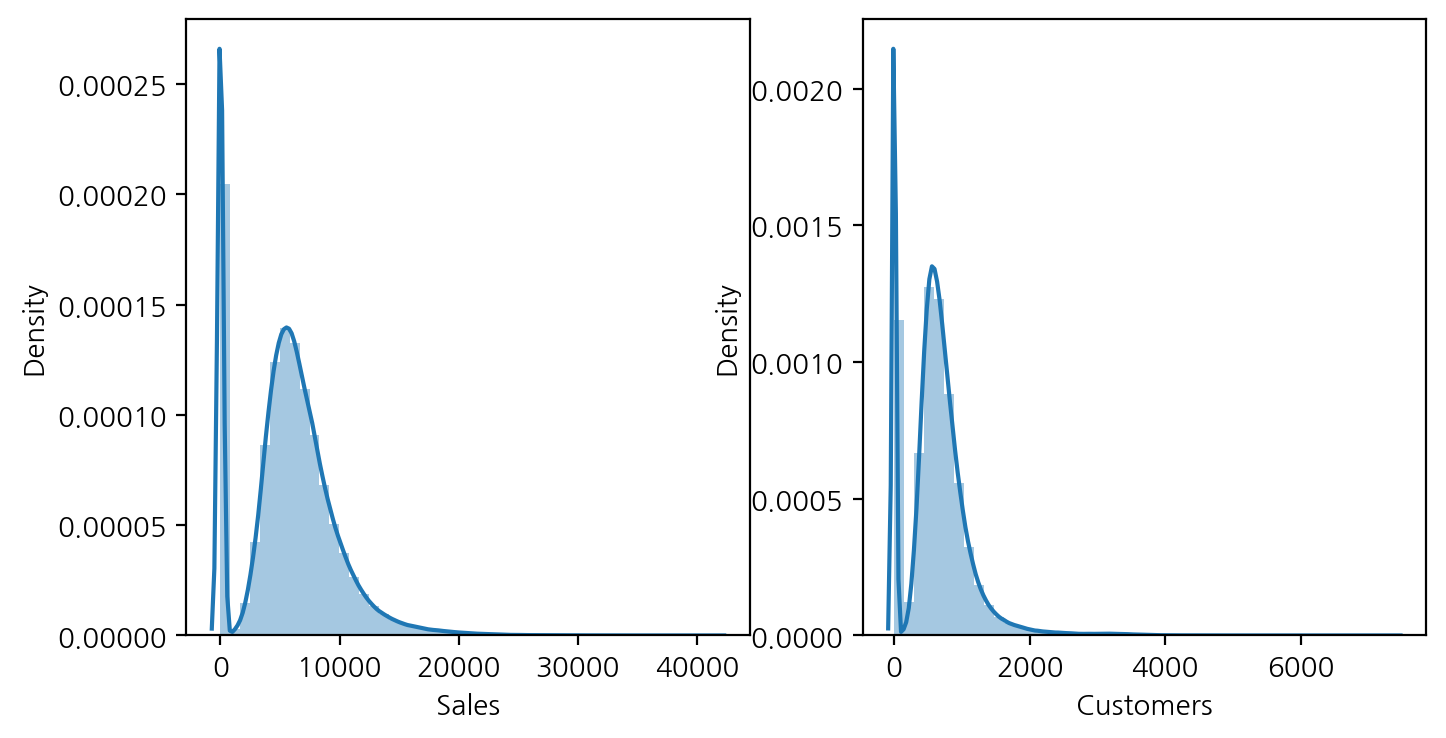

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.distplot(df['Sales'], ax=ax[0])
sns.distplot(df['Customers'], ax=ax[1])

<Axes: xlabel='None', ylabel='Customers'>

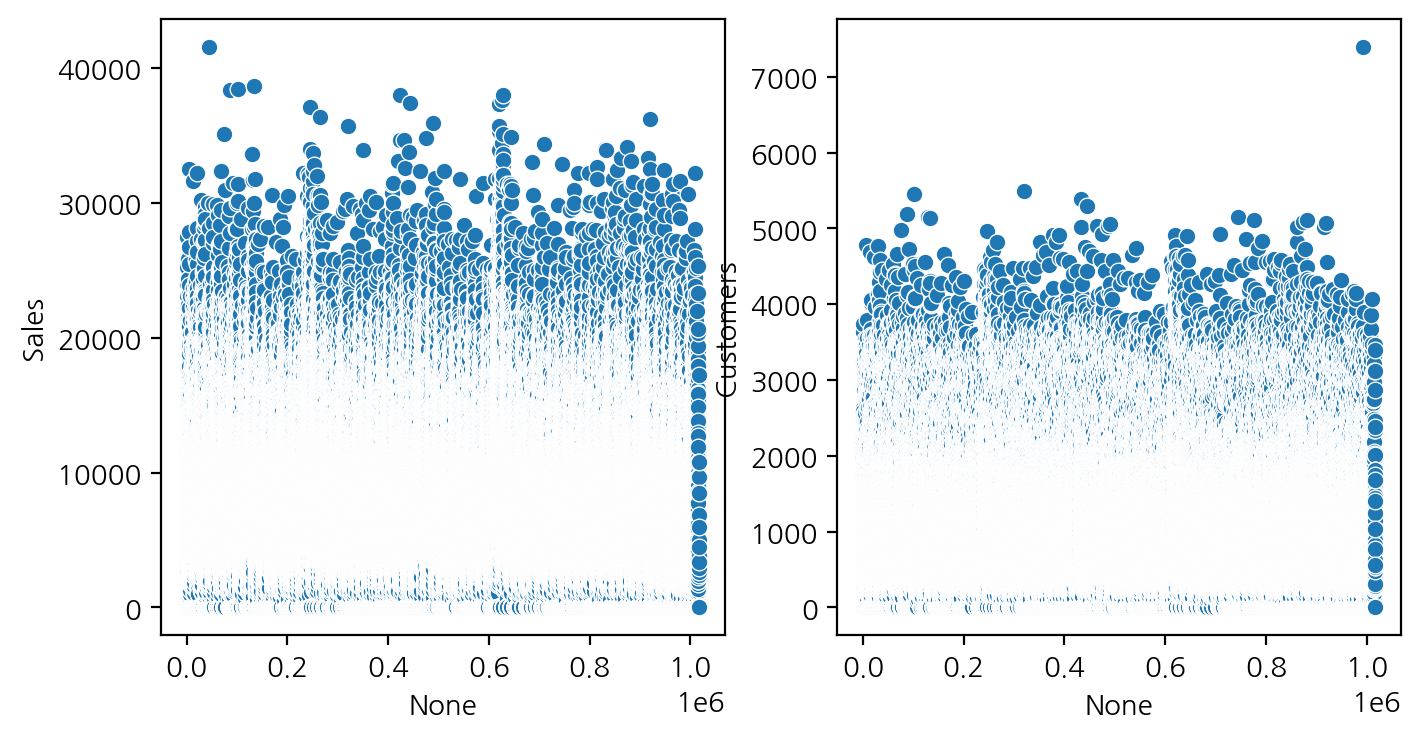

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.scatterplot(x=df.index, y=df['Sales'], ax=ax[0])
sns.scatterplot(x=df.index, y=df['Customers'], ax=ax[1])

In [55]:
df['Sales'].sort_values()

1017208        0
714268         0
714267         0
714266         0
714265         0
           ...  
424086     38037
87231      38367
101726     38484
132946     38722
44393      41551
Name: Sales, Length: 1017209, dtype: int64

In [56]:
df['Customers'].sort_values()

1017208       0
236043        0
236044        0
236045        0
236046        0
           ... 
444361     5297
432096     5387
101726     5458
319810     5494
993496     7388
Name: Customers, Length: 1017209, dtype: int64

<ipython-input-57-e4ec2ad6d91c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


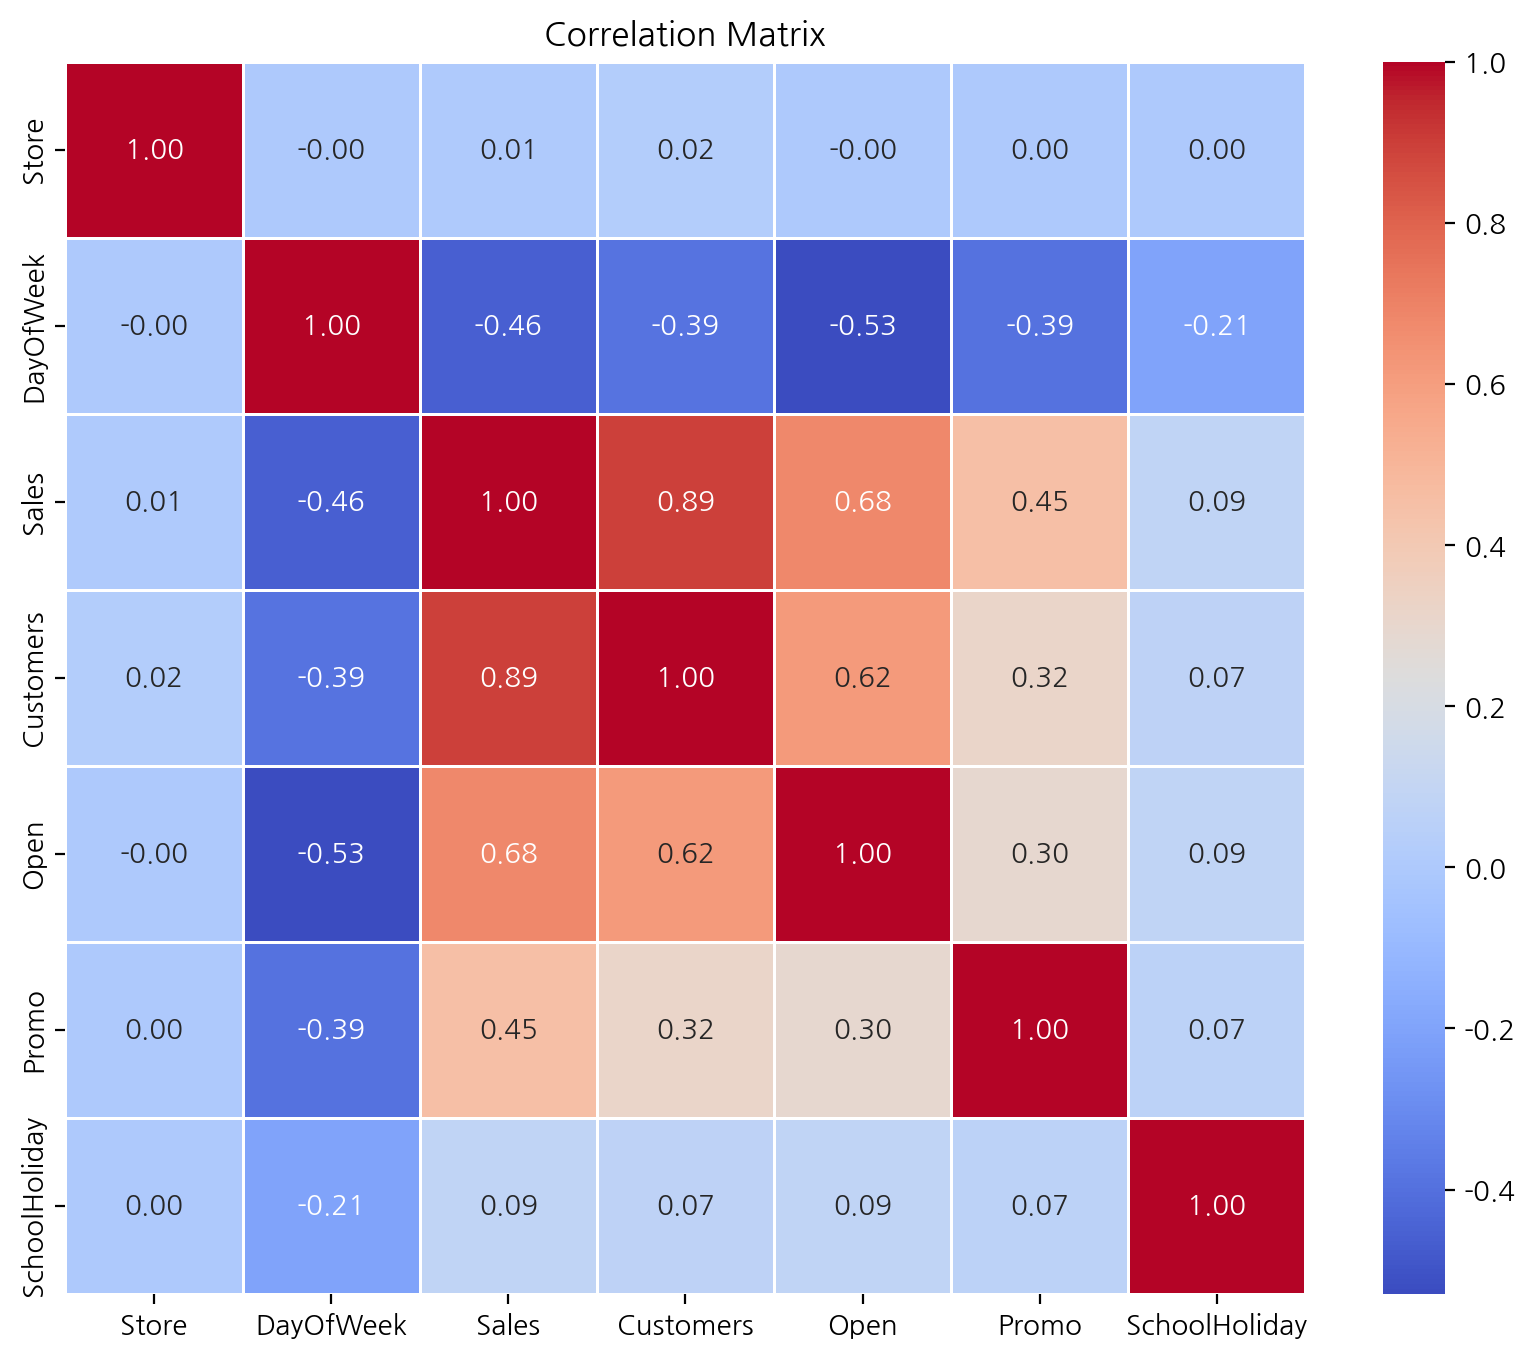

In [57]:
# 데이터셋의 수치형 변수 간의 상관관계 분석
correlation_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [58]:
from scipy import stats

# 데이터셋에서 특정 열을 선택하여 표본 추출
sample_data = df['Customers']

# 표본 평균과 표준편차 계산
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # 자유도를 고려한 표준편차 계산

# 데이터 포인트 수와 신뢰 수준 설정
n = len(sample_data)
confidence_level = 0.95

# t-분포에서의 신뢰구간 계산
t_value = stats.t.ppf((1 + confidence_level) / 2, df=n - 1)
margin_of_error = t_value * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("95% 신뢰구간:", confidence_interval)

95% 신뢰구간: (632.243447479869, 634.0484453366514)


In [59]:
# 표본 평균 계산
sample_mean = np.mean(sample_data)

# 모집단의 실제 평균 (예를 들어, 이 값은 4.0이라고 가정)
population_mean = 4.0

# 추정 오차 계산
estimation_error = sample_mean - population_mean

print("표본 평균:", sample_mean)
print("모집단 실제 평균:", population_mean)
print("추정 오차:", estimation_error)


표본 평균: 633.1459464082602
모집단 실제 평균: 4.0
추정 오차: 629.1459464082602


In [60]:
# 대립가설 (Alternative Hypothesis, H1) :
# 프로모션(Promo)이나 학교 휴일(SchoolHoliday) 여부에 관계 없이 매장의 판매량은 동일하다.

# 귀무가설 (Null Hypothesis, H0):
# 프로모션(Promo)이나 학교 휴일(SchoolHoliday) 여부에 따라 매장의 판매량은 다르다.

In [61]:
import pandas as pd
from scipy.stats import f_oneway

# ANOVA 검정 수행
# 각 조건별로 판매량(Sales) 데이터를 그룹화하여 ANOVA 검정을 수행합니다.
# 각 변수(Promo, SchoolHoliday)가 판매량(Sales)에 미치는 영향을 파악합니다.
f_statistic, p_value = f_oneway(df[df['Promo'] == 1]['Sales'],
                                 df[df['Promo'] == 0]['Sales'],
                                 df[df['SchoolHoliday'] == 1]['Sales'],
                                 df[df['SchoolHoliday'] == 0]['Sales'])

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# p-value를 기준으로 귀무가설을 기각 여부를 결정합니다.
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 적어도 하나의 그룹은 다른 그룹과 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 그룹 간에 유의미한 차이가 없습니다.")

F-statistic: 80347.01861259474
p-value: 0.0
귀무가설을 기각합니다. 적어도 하나의 그룹은 다른 그룹과 유의미한 차이가 있습니다.


In [62]:
# 주어진 결과에서 F-statistic 값은 매우 크고, p-value는 0에 매우 가까운 것으로 나타납니다. 이는 귀무가설을 기각하고 대립가설을 지지하는 강력한 증거입니다.
# 따라서 프로모션 여부, 학교 휴일 여부에 따라 매장의 판매량에는 유의한 차이가 있다고 결론 지을 수 있습니다.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 독립 변수와 종속 변수를 나누기
X = df[['Promo', 'SchoolHoliday']]
y = df['Sales']

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 11748510.385044992
